**1. import data**

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')

display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Basic information about data set : Dataset ini memuat data biaya asuransi kesehatan 1.338 individu di Amerika Serikat. Fitur-fitur pada data ini mencakup variabel demografi (seperti usia, jenis kelamin, wilayah) dan variabel terkait kesehatan (seperti BMI, status merokok, dan jumlah anak). Variabel targetnya adalah charges, yaitu besaran biaya yang ditagihkan kepada setiap individu. Dataset ini lazim digunakan untuk pemodelan regresi, penelitian ekonomi kesehatan, analisis penetapan premi asuransi, serta sebagai materi edukasi dalam pembelajaran mesin. Berikut merupakan detail untuk tiap kolomnya : 1. Age : Usia dari penerima manfaat utama (Int) 2. Sex: Jenis kelamin penerima manfaat (laki-laki, perempuan) 3. BMI : Indeks Massa Tubuh, pengukuran lemak tubuh berdasarkan tinggi dan berat badan (Float) 4. Children : Jumlah anak yang ditanggung oleh asuransi kesehatan (Int) 5. Smoker : Status perokok yaitu merokok atau tidak 6. Region : Wilayah tempat tinggal di AS (timur laut, barat laut, tenggara, barat daya) 7. Charges : Biaya asuransi kesehatan yang ditagihkan kepada penerima manfaat (bilangan desimal) Untuk potensi penggunaan dari dataset tersebut berupa membangun model prediktif untuk biaya medis, menganalisis bagaimana kebiasaan merokok dapat dan IMT mempengaruhi biaya, dan menganalisis tren keterjangkauan layanan Kesehatan.

3. Cek Data Duplicate & Nilai Uniqe

In [12]:
df.duplicated().sum()

np.int64(1)

In [15]:
print("Unique values for 'sex':", df['sex'].unique())
print("Unique values for 'smoker':", df['smoker'].unique())
print("Unique values for 'region':", df['region'].unique())

Unique values for 'sex': ['female' 'male']
Unique values for 'smoker': ['yes' 'no']
Unique values for 'region': ['southwest' 'southeast' 'northwest' 'northeast']


4. Kemudian Kita akan memahami jangkauan nilai seperti sex dan smoker menggunakan fungsi grouping atau pengelompokan df.groupby untuk mengelompokan menjadi satu kesatuan. tujuannya untuk melakukan perhitungan statistik seperti rata-rata, hitungan, atau total.

In [5]:
from IPython.display import display
import pandas as pd

df = pd.read_csv('insurance.csv')
rata_rata_perokok_df = df.groupby('smoker')['charges'].mean().reset_index()
rata_rata_perokok_df.columns = ['Status Perokok', 'Rata-rata Tagihan (USD)']

print("Rata-rata Tagihan Berdasarkan Status Perokok:")
display(rata_rata_perokok_df)

Rata-rata Tagihan Berdasarkan Status Perokok:


,Status Perokok,Rata-rata Tagihan (USD)
0,no,8434.268298
1,yes,32050.231832


Dari hasil di atas dapat disimpulkan bahwa kelompok perokok 32,050.23 memiliki rata-rata tagihan medis hampir empat kali lipat lebih mahal yang berarti jauh lebih tinggi di bandingkan non-perokok 8,434.27.

Melanjutkan analisis status perokok, Kita akan melanjutkan analisis apakah gender juga berperan dalam perbedaan biaya medis yang ditagihkan, cara yang digunakan masih sama, Kita menggunakan groupby untuk memisahkan berdasarkan gender male dan female dan kemudian di hitung rata-ratanya.

In [6]:
rata_rata_gender_df = df.groupby('sex')['charges'].mean().reset_index()
rata_rata_gender_df.columns = ['Gender', 'Rata-rata Tagihan (USD)']

print("\n Rata-rata Tagihan Berdasarkan Gender:")
display(rata_rata_gender_df)


 Rata-rata Tagihan Berdasarkan Gender:


,Gender,Rata-rata Tagihan (USD)
0,female,12569.578844
1,male,13956.751178


Dari hasil di atas dapat disimpulkan bahwa kelompok laki-laki atau male memiliki rata-rata tagihan medis yang lebih mahal 13,956.75 dibandingkan kelompok perempuan atau female 12,569.58. kedua analisis ini menujukan bahwa risiko kesehatan yang terkait dengan merokok jauh melampaui perbedaan biaya yang di kaitkan dengan gender

Selanjutnya Kita akan membuat visualisasi dari hasil analisis sebelumnya dalam bentuk bar chart atau grafik batang menggunakan rata-rata dari perokok lalu memberikan label pada sumbu X dan Y dan menyimpan grafik yang sudah jadi ke dalam, untuk memperkuat kesimpulan bahwa status perokok adalah faktor biaya paling dominan dalam bentuk gambar agar lebih mudah di pahami oleh audiens mana pun.

<Figure size 600x400 with 0 Axes>

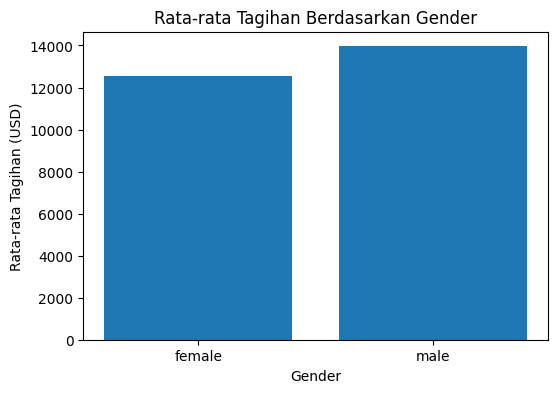

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.bar(rata_rata_perokok_df['Status Perokok'],
        rata_rata_perokok_df['Rata-rata Tagihan (USD)'])


plt.title('Rata-rata Tagihan Berdasarkan Status Perokok')
plt.xlabel('Status Perokok')
plt.ylabel('Rata-rata Tagihan (USD)')

plt.savefig('visualisasi_tagihan_perokok_dasar.png')
plt.clf()

plt.figure(figsize=(6, 4))


plt.bar(rata_rata_gender_df['Gender'],
        rata_rata_gender_df['Rata-rata Tagihan (USD)'])

plt.title('Rata-rata Tagihan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Tagihan (USD)')

plt.savefig('visualisasi_tagihan_gender_dasar.png')

5. MENEMUKAN NULL VALUES
Pada data ini tidak ditemukan ada null values

In [8]:
import pandas as pd
df = pd.read_csv("insurance.csv")
print('NULL VALUES')
print(df.isnull().sum())
print('\n')
print('Dengan Persentase')
print((df.isnull().mean() * 100))

NULL VALUES
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Dengan Persentase
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


6. REPLACE SEMUA NULL VALUES
Dikarenakan pada pengecekan null values tidak ditemukan data null nya, maka tidak ada data yang harus diganti atau diubah

7. cek type data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


8. filter data

In [3]:
df['bmi']

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [4]:
df[['sex', 'charges']]

,sex,charges
0,female,16884.92400
1,male,1725.55230
2,male,4449.46200
3,male,21984.47061
4,male,3866.85520
...,...,...
1333,male,10600.54830
1334,female,2205.98080
1335,female,1629.83350
1336,female,2007.94500


9. Membuat Box Plot
Box Plot sangat efektif untuk membandingkan distribusi variabel numerik (charges) berdasarkan kategori (smoker). Plot ini menunjukkan Median, Kuartil (IQR), dan Outliers.

Data berhasil dimuat. Siap visualisasi.


/tmp/ipython-input-4197986884.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


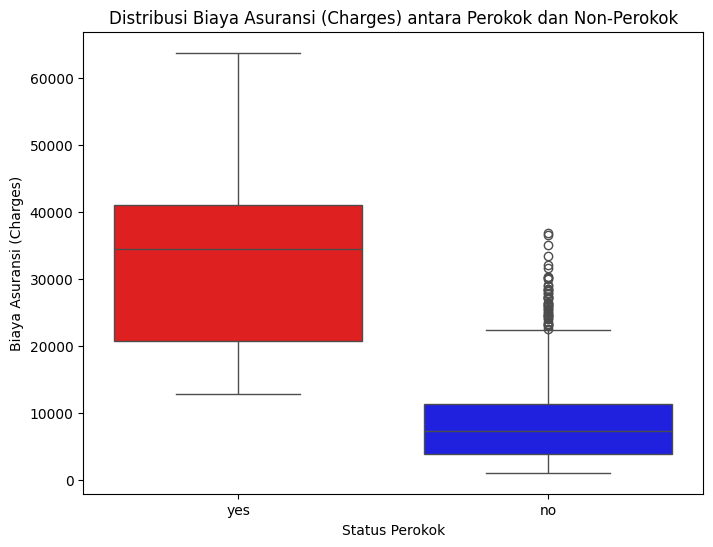

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('insurance.csv')
    print("Data berhasil dimuat. Siap visualisasi.")
except FileNotFoundError:
    print("Error: Pastikan file 'insurance.csv' sudah diupload ke sesi Colab Anda.")

plt.figure(figsize=(8, 6))

sns.boxplot(
    x='smoker',
    y='charges',
    data=df,
    palette={'yes': 'red', 'no': 'blue'}
)

plt.title('Distribusi Biaya Asuransi (Charges) antara Perokok dan Non-Perokok')
plt.xlabel('Status Perokok')
plt.ylabel('Biaya Asuransi (Charges)')
plt.show()

Box Plot yang dihasilkan membandingkan biaya asuransi (charges) antara perokok (smoker = 'yes') dan non-perokok (smoker = 'no') menunjukkan perbedaan yang sangat signifikan dalam distribusi biaya.

10. Corelation
Korelasi digunakan untuk mengukur hubungan linier antar variabel. Variabel kategorikal harus diubah menjadi numerik (smoker: 0 untuk 'no', 1 untuk 'yes') sebelum dihitung.

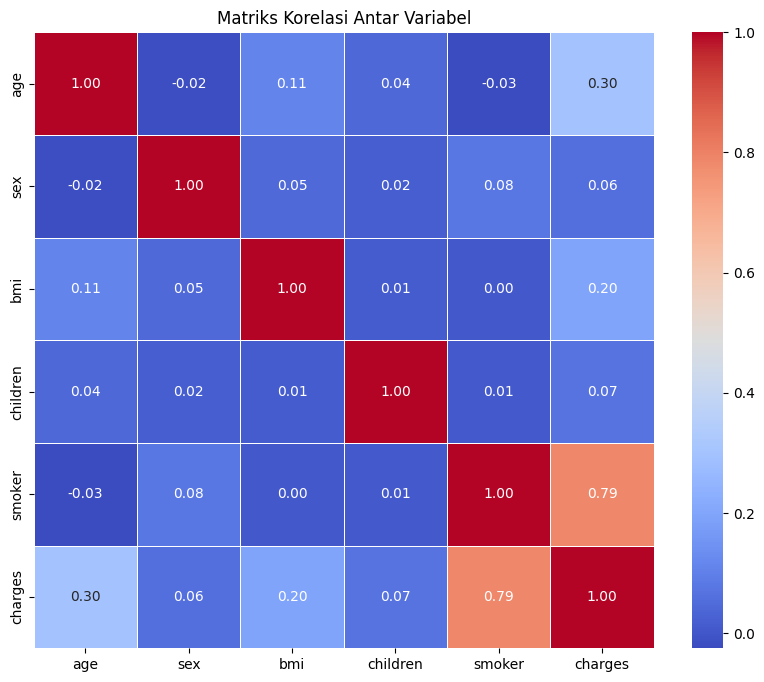


--- Nilai Korelasi Biaya Asuransi (Charges) dengan Variabel Lain ---
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
Name: charges, dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.copy()

df_corr['sex'] = df_corr['sex'].map({'female': 0, 'male': 1})

df_corr['smoker'] = df_corr['smoker'].map({'no': 0, 'yes': 1})

correlation_matrix = df_corr[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

print("\n--- Nilai Korelasi Biaya Asuransi (Charges) dengan Variabel Lain ---")
print(correlation_matrix['charges'].sort_values(ascending=False))

Korelasi mengonfirmasi hasil yang didapat dari Box Plot sebelumnya dimana, status perokok adalah faktor risiko utama dan variabel prediktif terkuat untuk biaya asuransi. Sementara itu, usia memiliki peran sekunder yang moderat. Variabel lain seperti jenis kelamin dan jumlah anak hampir tidak relevan dalam model linier sederhana ini.